In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dummy code

ratio = 6
mGlob = 20*ratio
nGlob = 15*ratio

x0 = 0
y0 = 0
dx = 2/ratio
dy = 2/ratio

x = np.arange(0,mGlob)*dx + x0
y = np.arange(0,nGlob)*dy + y0

[X,Y] = np.meshgrid(x,y)







x = np.arange(0,mGlob)*dx + x0
y = np.arange(0,nGlob)*dy + y0

[X,Y] = np.meshgrid(x,y)

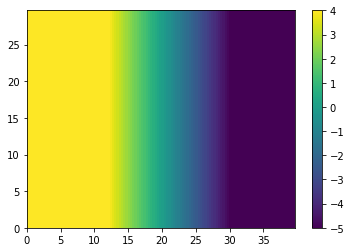

In [3]:

bathy = 0.5*(20-X)

bathy[bathy<-5] = -5
bathy[bathy>4] = 4


bathyFun = -bathy

bathy = -bathyFun

c = plt.pcolor(x,y,-bathyFun)

plt.colorbar(c)



TypeError: getPrism() missing 1 required positional argument: 'bottomBathy'

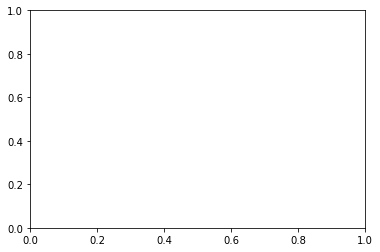

In [18]:







def get1DBox( S, s0, L ):

    return 1 - (np.abs(S-s0)/(L/2) < 1) 
 

def get1DTrap( S, s0, L ):

    return np.minimum( np.abs(S-s0)/(L/2) , 1 )


def getPrism( x1, y1, x2, y2, baseWidth, topWidth, height, bottomBathy ):

    slopeAngle = np.arctan( height/((baseWidth-topWidth)/2)   )
    projectedHeight = baseWidth/2*np.tan(slopeAngle)  

    length = ((x2-x1)**2 + (y2-y1)**2)**0.5

    angle = np.arctan2( y2 - y1 , x2 - x1)
    
    x0 = x1 + np.cos(angle)*length/2
    y0 = y1 + np.sin(angle)*length/2
    
    angleRot = angle - np.pi/2
    U = (X-x0)*np.cos(-angleRot) - (Y-y0)*np.sin(-angleRot)
    V = (X-x0)*np.sin(-angleRot) + (Y-y0)*np.cos(-angleRot)


    sol = projectedHeight*(1 - np.maximum(get1DTrap(U, 0, baseWidth) , get1DBox( V, 0, length ) ) )
    
    sol = np.minimum( sol , height  ) 
    
    sol = np.maximum( sol , bottomBathy )
    
    
    return sol 
#sol = projectedHeight*(1 - np.maximum( get1DTrap(X, x0, baseWidth) , get1DTrap(Y, y0, length) ))








x1 = 20
y1 = 5

x2 = 25
y2 = 25







fig, ax = plt.subplots()

c = ax.pcolor(X,Y,getPrism( x1, y1, x2, y2, baseWidth, topWidth, height ))
plt.colorbar(c)



In [5]:
from shapely.geometry import Polygon, Point
import shapely 


angle = np.arctan2( y2 - y1 , x2 - x1)
angleRot = angle - np.pi/2

width = baseWidth 

length = ((x2-x1)**2 + (y2-y1)**2)**0.5

x0 = x1 + np.cos(angle)*length/2
y0 = y1 + np.sin(angle)*length/2

vetrices = [
    ( -width/2, -length/2 ),
    (  width/2, -length/2 ),
    (  width/2,  length/2 ),
    ( -width/2,  length/2 )
]


baseShape = Polygon( vetrices )

rotShape = shapely.affinity.rotate(baseShape, angleRot , origin='center', use_radians=True)

shape = shapely.affinity.translate(rotShape, xoff=x0, yoff=y0, zoff=0.0 )
shape



idxs = [] 

for j in range(nGlob):

    for i in range(mGlob):
        
        pt = Point( ( x[i] , y[j])  )
        
        if shape.contains( pt ):
            idxs.append( (j,i) )
            


idxs = tuple(np.array(idxs).T)


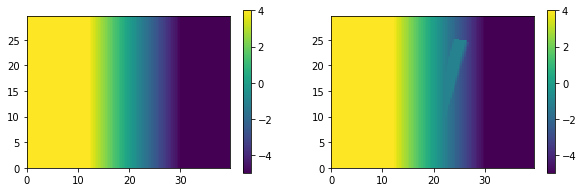

In [37]:

bathy = - bathyFun

minDepth = np.min( bathy[idxs] )

baseWidth  = 4
topWidth = 2
heightAboveWater = -1

height = heightAboveWater - minDepth

bottomBathy = bathy*0
bottomBathy[idxs] = bathy[idxs] - minDepth



bathy[idxs] = minDepth

bathy += getPrism( x1, y1, x2, y2, baseWidth, topWidth, height, bottomBathy )



fig, axs = plt.subplots(1,2)

fig.set_size_inches(10, 3)
axs=axs.flatten()


c = axs[0].pcolor(X,Y,-bathyFun)
axs[0].set_aspect('equal', 'box')

plt.colorbar(c,ax=axs[0])

c = axs[1].pcolor(X,Y,bathy)
axs[1].set_aspect('equal', 'box')
plt.colorbar(c,ax=axs[1])

fig.savefig('testBreakwater.png', dpi=200)
